# Soft Actor-Critic (SAC)

https://spinningup.openai.com/en/latest/algorithms/sac.html

<a href="https://colab.research.google.com/github/cirocavani/MO651-Robotics/blob/master/workspace/P4/OpenAI%20Spinning%20Up%20-%20SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Colab-only
#
# 1. Uncomment commands below and run this cell once.
#
# 2. Go to Menu "Edit > Notebook settings", on "Runtime type" select "OpenAI Spinning Up" and click on "Save".
#
# 3. After restart, continue running the notebook.


# !git clone --depth=1 https://github.com/cirocavani/MO651-Robotics.git Robotics
# !Robotics/setup/downloads.sh > /dev/null 2>&1
# !Robotics/setup/install-conda.sh > /dev/null 2>&1
# !Robotics/setup/install-spinningup.sh > /dev/null 2>&1
# !jupyter kernelspec install Robotics/software/jupyter-data/kernels/spinningup
# !sed -i -e '/c\.IPKernelApp\.kernel\_class*/ s/^#*/#/' /etc/ipython/ipython_config.py

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

sns.set(rc={"figure.figsize": (12, 8)})

In [3]:
from spinup import sac

help(sac)

Help on function sac in module spinup.algos.sac.sac:

sac(env_fn, actor_critic=<function mlp_actor_critic at 0x7f328dbcd950>, ac_kwargs={}, seed=0, steps_per_epoch=5000, epochs=100, replay_size=1000000, gamma=0.99, polyak=0.995, lr=0.001, alpha=0.2, batch_size=100, start_steps=10000, max_ep_len=1000, logger_kwargs={}, save_freq=1)
    Args:
        env_fn : A function which creates a copy of the environment.
            The environment must satisfy the OpenAI Gym API.
    
        actor_critic: A function which takes in placeholder symbols 
            for state, ``x_ph``, and action, ``a_ph``, and returns the main 
            outputs from the agent's Tensorflow computation graph:
    
            ===========  ================  ======================================
            Symbol       Shape             Description
            ===========  ================  ======================================
            ``mu``       (batch, act_dim)  | Computes mean actions from policy
      

## Running Experiments

https://spinningup.openai.com/en/latest/user/running.html

https://spinningup.openai.com/en/latest/user/running.html#launching-from-scripts

https://gym.openai.com/envs/LunarLanderContinuous-v2/

In [4]:
import os
import shutil

import gym

In [5]:
exp_name = 'LunarLanderContinuous-v2-SAC_10'
output_dir = os.path.join('data', exp_name)
hidden_sizes = [64, 64]

if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

In [6]:
def env_lunar_lander_continuous_v2():
    return gym.make('LunarLanderContinuous-v2')

logger_kwargs = dict(exp_name=exp_name, output_dir=output_dir)
ac_kwargs = dict(hidden_sizes=hidden_sizes)

sac(env_fn=env_lunar_lander_continuous_v2,
    ac_kwargs=ac_kwargs,
    logger_kwargs=logger_kwargs,
    epochs=100)

Logging data to data/LunarLanderContinuous-v2-SAC_10/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"mlp_actor_critic",
    "alpha":	0.2,
    "batch_size":	100,
    "env_fn":	"env_lunar_lander_continuous_v2",
    "epochs":	100,
    "exp_name":	"LunarLanderContinuous-v2-SAC_10",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f328dbebe48>":	{
            "epoch_dict":	{},
            "exp_name":	"LunarLanderContinuous-v2-SAC_10",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"data/LunarLanderContinuous-v2-SAC_10",
            "output_file":	{
                "<_io.TextIOWrapper name='data/LunarLanderContinuous-v2-SAC_10/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "e

## Experiment Outputs

https://spinningup.openai.com/en/latest/user/saving_and_loading.html#loading-and-running-trained-policies

https://github.com/openai/spinningup/blob/master/spinup/utils/test_policy.py


In [7]:
from gym.wrappers import Monitor
from spinup.utils.test_policy import load_policy, run_policy

env, get_action = load_policy(output_dir)
env = Monitor(env, output_dir, video_callable=lambda episode_id: True, force=True)
run_policy(env, get_action, num_episodes=5, render=True)
env.close()

Using default action op.
Logging data to /tmp/experiments/1574286240/progress.txt
Episode 0 	 EpRet 254.483 	 EpLen 211
Episode 1 	 EpRet 316.897 	 EpLen 254
Episode 2 	 EpRet 242.850 	 EpLen 205
Episode 3 	 EpRet 161.470 	 EpLen 1000
Episode 4 	 EpRet 291.336 	 EpLen 787
-------------------------------------
|    AverageEpRet |             253 |
|        StdEpRet |              53 |
|        MaxEpRet |             317 |
|        MinEpRet |             161 |
|           EpLen |             491 |
-------------------------------------


In [8]:
from IPython.display import display, HTML
import base64

videos = [
    os.path.join(output_dir, filename)
    for filename in sorted(os.listdir(output_dir))
    if filename.endswith('.mp4')
]

for i, file in enumerate(videos[:-1]):
    with open(file, 'r+b') as f:
        encoded = base64.b64encode(f.read()).decode('ascii')
    html = HTML(data=f'''
<video width="360" height="auto" alt="Episode {i}" controls>
<source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
</video>''')
    display(html)

## Plotting Results

https://spinningup.openai.com/en/latest/user/plotting.html

https://github.com/openai/spinningup/blob/master/spinup/utils/plot.py

Plotting from...

data/LunarLanderContinuous-v2-SAC_10



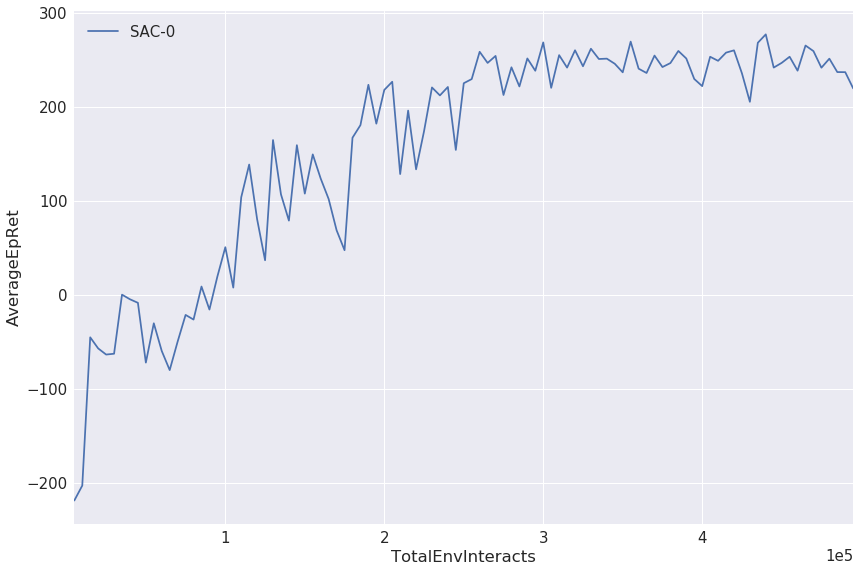

In [9]:
from spinup.utils.plot import make_plots

make_plots([output_dir], ['SAC'], 'TotalEnvInteracts', 'AverageEpRet', True)